# Breast Cancer Prediction

The data and problem description is here:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

Need to predict breast cancer, using supervised machine learning skills. This is version I, I used the data 'breast-cancer-wisconsin.data', which is clean and nice. Machine learning models can be implemented for classification.  

In [2]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from pandas.api.types import is_numeric_dtype
#from sklearn import preprocessing
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint

## EDA

In [3]:
# Read data
columns = ['id',
             'cthick',
             'ucsize',
             'ucshape',
             'madhesion',
             'secsize',
             'bnuclei',
             'bchromatin',
             'nnucleoli',
             'mitoses',
             'Class']

df = pd.read_csv('breast-cancer-wisconsin.data',names=columns)

In [4]:
df.head()

,id,cthick,ucsize,ucshape,madhesion,secsize,bnuclei,bchromatin,nnucleoli,mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.shape

(699, 11)

In [6]:
# check if the data includes duplications

df[df.duplicated(keep=False)]

,id,cthick,ucsize,ucshape,madhesion,secsize,bnuclei,bchromatin,nnucleoli,mitoses,Class
42,1100524,6,10,10,2,8,10,7,3,3,4
62,1116116,9,10,10,1,10,8,3,3,1,4
168,1198641,3,1,1,1,2,1,3,1,1,2
207,1218860,1,1,1,1,1,1,3,1,1,2
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
267,320675,3,3,5,2,3,10,7,1,1,4
272,320675,3,3,5,2,3,10,7,1,1,4


In [7]:
# Drop duplications

df = df.drop_duplicates()
df.shape

(691, 11)

In [8]:
# check the type of each column
df.dtypes

id             int64
cthick         int64
ucsize         int64
ucshape        int64
madhesion      int64
secsize        int64
bnuclei       object
bchromatin     int64
nnucleoli      int64
mitoses        int64
Class          int64
dtype: object

In [9]:
df.bnuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [10]:
df = df[df.bnuclei !='?']
df.shape

(675, 11)

In [11]:
df.bnuclei = df.bnuclei.astype(int)
df.dtypes

id            int64
cthick        int64
ucsize        int64
ucshape       int64
madhesion     int64
secsize       int64
bnuclei       int64
bchromatin    int64
nnucleoli     int64
mitoses       int64
Class         int64
dtype: object

In [12]:
# check imbalance of the responses

df.Class.value_counts()

2    439
4    236
Name: Class, dtype: int64

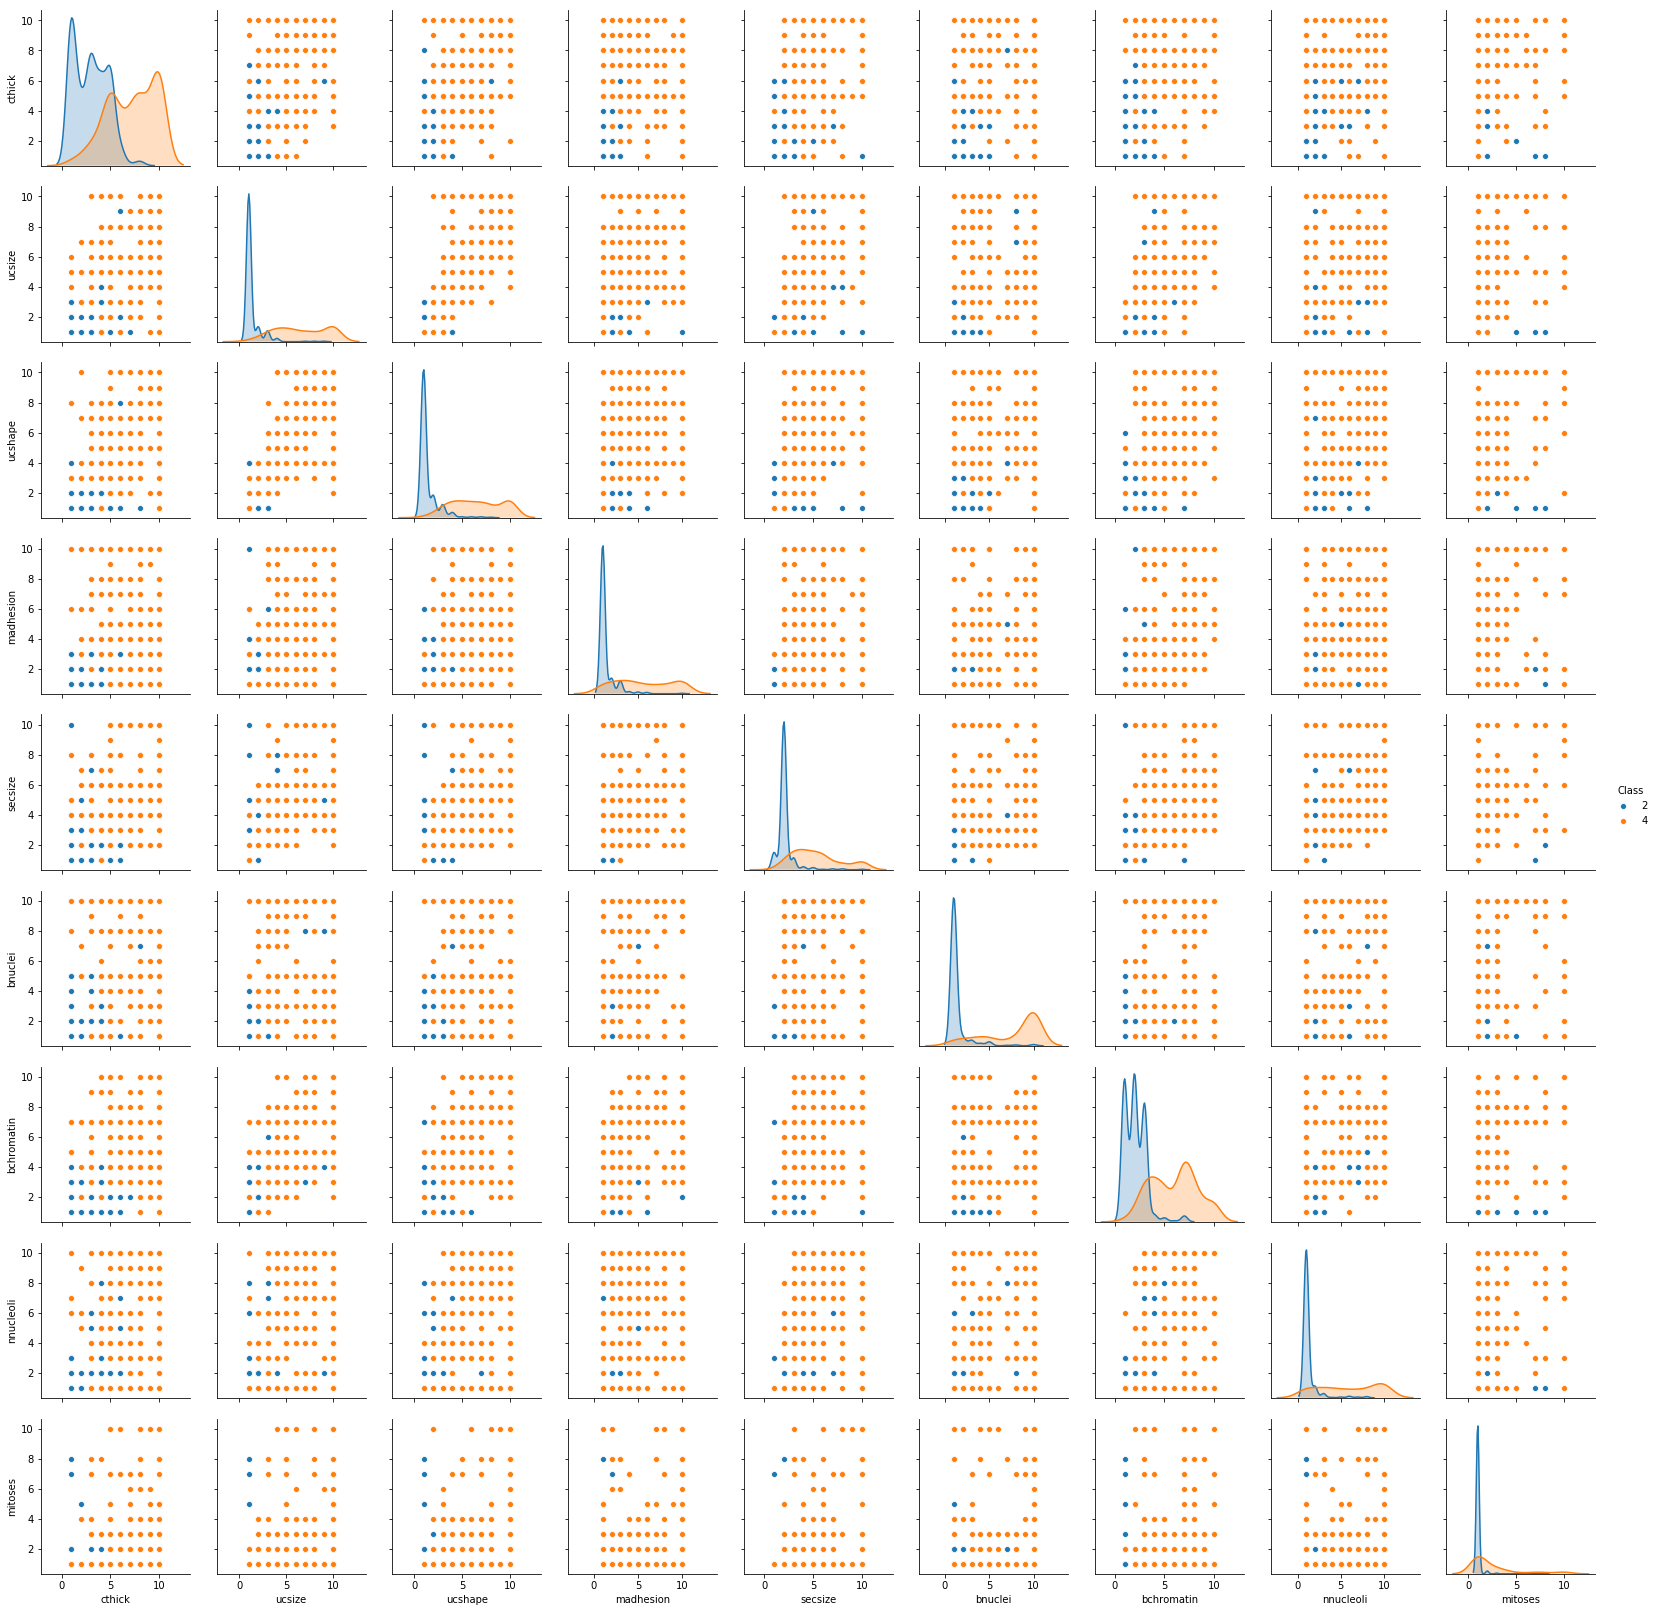

In [13]:
features = ['cthick',
 'ucsize',
 'ucshape',
 'madhesion',
 'secsize',
 'bnuclei',
 'bchromatin',
 'nnucleoli',
 'mitoses']

sns.pairplot(df, hue = 'Class', vars=features)

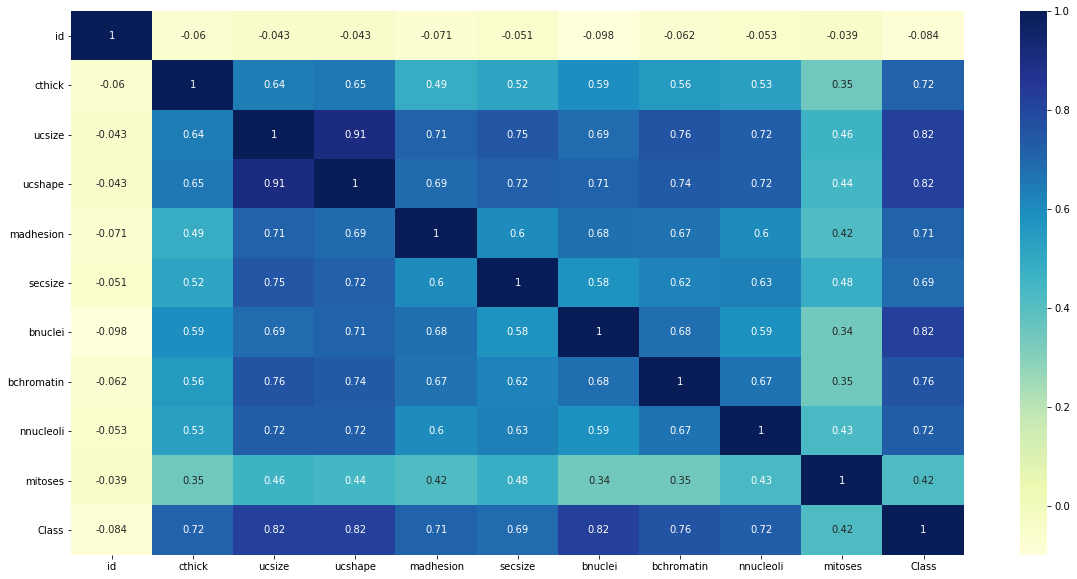

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()

## Machine Learning Models

In [15]:
# Separate input features and target

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

y = df.Class
X = df.drop(['id','Class'], axis=1)

y = np.array([number[0] for number in lb.fit_transform(y)])

In [16]:
# Split the data into training and testing, pretty standard pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=66)

### Logistic Regression

In [17]:
# Fit Logistic classification model

logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
f1_score(y_test, y_pred)

0.963855421686747

In [18]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1])

In [19]:
np.array(np.unique(y_test, return_counts=True)).T

array([[ 0, 95],
       [ 1, 40]])

In [20]:
logreg_matrix = metrics.confusion_matrix(y_test,y_pred)
logreg_matrix

array([[92,  3],
       [ 0, 40]])

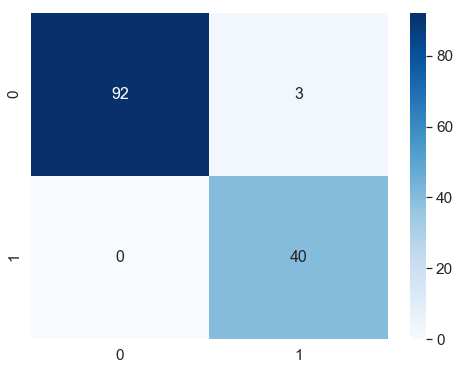

In [22]:
df_cm = pd.DataFrame(logreg_matrix, range(2),
                  range(2))
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap="Blues")# font size

plt.show()

In [23]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred)

### SVM

In [24]:
# Fit SVM model

svc_model = SVC(gamma = 'scale')
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred)
svc_matrix = metrics.confusion_matrix(y_test,y_pred)
svc_matrix

array([[90,  5],
       [ 0, 40]])

In [25]:
f1_score(y_test, y_pred)

0.9411764705882353

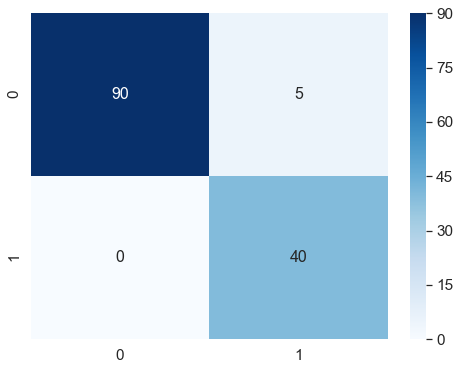

In [26]:
df_cm = pd.DataFrame(svc_matrix, range(2),
                  range(2))
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap="Blues")# font size

plt.show()

### Random Forest

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=66)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
fpr_rf, tpr_rf, _= roc_curve(y_test, y_pred)
f1_score(y_test, y_pred)

0.951219512195122

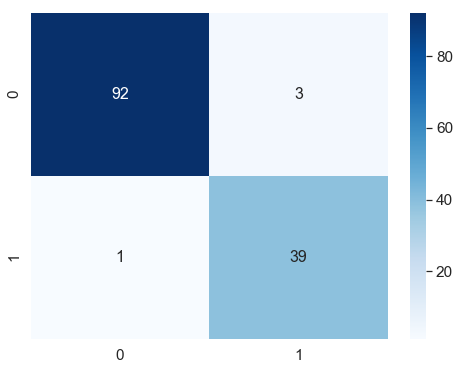

In [28]:
rf_matrix = metrics.confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(rf_matrix, range(2),
                  range(2))
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, cmap="Blues")# font size

plt.show()

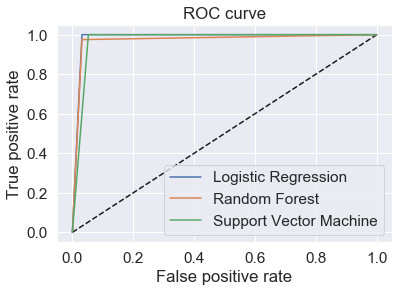

In [29]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_svc, tpr_svc, label='Support Vector Machine')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Short Summary: Logistic Regression, SVC and Random Forest give similar predictions.